# Capstone project - Car accident severity (Week 1)
### Applied Data Science project - IBM (Coursera)

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Set Review](#review)
* [Methodology](#methodology)
* [Modelling](#modelling)
* [Results and discussion](#discussion)
* [Conclusion](#conclusion)

### 1. Introduction

#### 1.1 A description of the problem and a discussion of the background

Serious situation with COVID-19 in the world should change travel habits. More people will start to avoid public transport, because of possibility to get sick. So some of them will start to travel to work on feet or by bike. 

Another reason, which will eventually change travel habits is the fact that the world is getting greener. People understand that they has to do something to reduce co2 emmission. Of course some of them is starting to use electric car, however, some people choose to travel on foot or by bike.

I will use *Collisions* data from Seattle city to generate a few most worrying neighborhoods based on my criteria.

#### 1.2 A description of the data and how it will be used to solve the problem.

Based on definition of my problem, factors that will influence our decission are:
* number of collisions, which includes pedestrians and bicycles.
* additional factors may have contributed to the collisions (weather, road condition, light condition and etc.)
* seriousity of collisions.

I decided to use various Machine Learning methods to analyze data and find the impact to collisions associated with pedestrians and bicycles.

Following data sources will be needed to extract/generate the required information:
* ArcGIS Metadata Form of all year collisions data set from **Seattle** city.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium import plugins

### 2. Data Set Review

In [2]:
#importing dataset
df = pd.read_csv("/resources/My labs/Data-Collisions.csv")

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [5]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [7]:
#Dealing with missing data
df.dropna(subset=["ADDRTYPE"], axis=0, inplace=True)
df.dropna(subset=["LOCATION"], axis=0, inplace=True)
df.dropna(subset=["JUNCTIONTYPE"], axis=0, inplace=True)
inn = 'N'
df["INATTENTIONIND"].replace(np.nan, inn, inplace=True)
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)
df.dropna(subset=["WEATHER"], axis=0, inplace=True)
df["SPEEDING"].replace(np.nan, inn, inplace=True)
df["PEDROWNOTGRNT"].replace(np.nan, inn, inplace=True)
df.dropna(subset=["ROADCOND"], axis=0, inplace=True)
df.dropna(subset=["LIGHTCOND"], axis=0, inplace=True)
df.dropna(subset=["X"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
#df_junc = df['CROSSWALKKEY'].value_counts().to_frame() ,<- this function was used to count values in specific column.

In [55]:
#missing_data = df.isnull()
#for column in missing_data.columns.values.tolist():
#    print(column)
#    print (missing_data[column].value_counts())
#    print("")

In [8]:
df.isna().sum().to_frame().rename(columns={0:'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,0
Y,0
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,0
INTKEY,117085


For most of columns missing data was removed. INATTENTIONIND, SPEEDING, PEDROWNOTGRNT data was updated for futher research. The idea is to use this data as dummy variables. 
I will use following variables to classify the severity of the accidents, when bicycles and pedestrians is included:
* PEDCOUNT - The number of pedestrians involved in the collision. This is entered by the state.
* PEDCYLCOUNT - The number of bicycles involved in the collision. This is entered by the state.
* INATTENTIONIND - Whether or not collision was due to inattention.
* WEATHER - A description of the weather conditions during the time of the collision.
* ROADCOND - The condition of the road during the collision.
* LIGHTCOND - The light conditions during the collision.
* SPEEDING - Whether or not speeding was a factor in the collision.

In [9]:
df.shape

(180067, 38)

After data wrangling, data set has 182 660 samples and 38 columns. 

#### 2.1 Target Variable
The target variable is SEVERITYCODE. This variable reflects the type of damage caused by the collision.

* 1 - Property damage.
* 2 - Injury.

In [10]:
df_target_var = df['SEVERITYCODE'].value_counts().to_frame()
df_target_var['SEVERITYDESC'] = ['Property Damage', 'Injury']
df_target_var.index.name = 'Severity code'
df_target_var.rename(columns={'SEVERITYCODE':'Number of collisions', 'SEVERITYDESC': 'Accident description'}, inplace=True)
df_target_var

,Number of collisions,Accident description
Severity code,,
1,124258,Property Damage
2,55809,Injury


#### 2.2 Anual number of accidents

As we can see every year annual number of accident is decreasing. Probably good decission was made to decrease accidents with car. But the number of pedestrian involved in collisions is stable over the year. It's a little disapointing number. Of course the situation with collisions which includes bicycles is worse. According to the data, collisions which includes pedestrians and bicycles is more related with injuries than property damage. 

Based on these data, I can draw two conclusions. More and more people are walking and using bikes, leading to more collisions. Also, due to the growing number of road users, the safety of pedestrians and cyclists is not sufficiently ensured.

Text(0.5, 1.0, 'Annual traffic incidents in Seattle - by Severity')

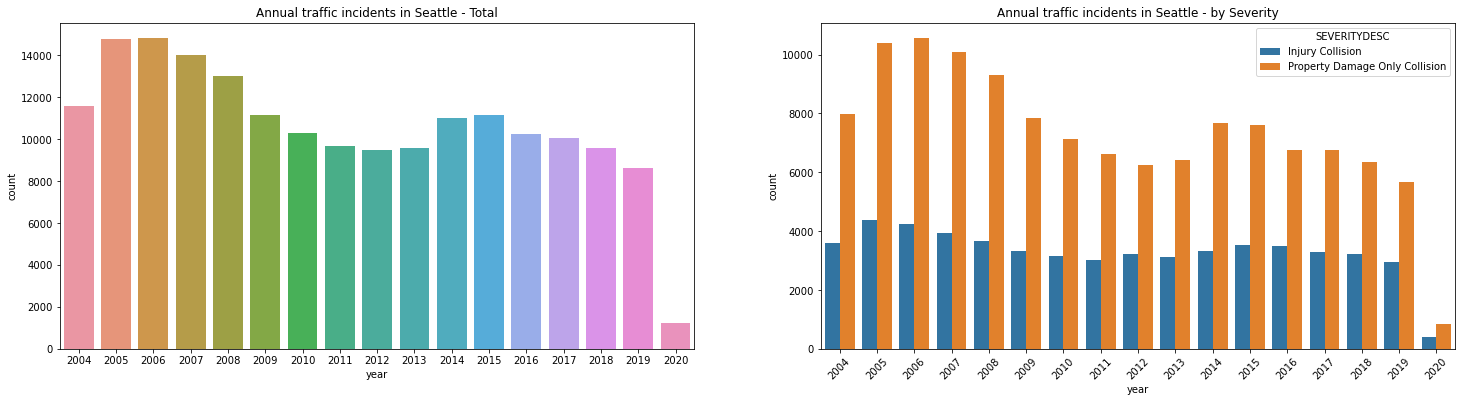

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 6))

df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts().sort_index()
sns.countplot(x="year", data=df, ax=ax1)
plt.xticks(rotation=45)
sns.countplot(x="year", hue="SEVERITYDESC", data=df, ax=ax2)
plt.xticks(rotation=45)
ax1.set_title('Annual traffic incidents in Seattle - Total')
ax2.set_title('Annual traffic incidents in Seattle - by Severity')

Text(0.5, 1.0, 'Annual traffic incidents in Seattle - by Severity (Bicycles involved)')

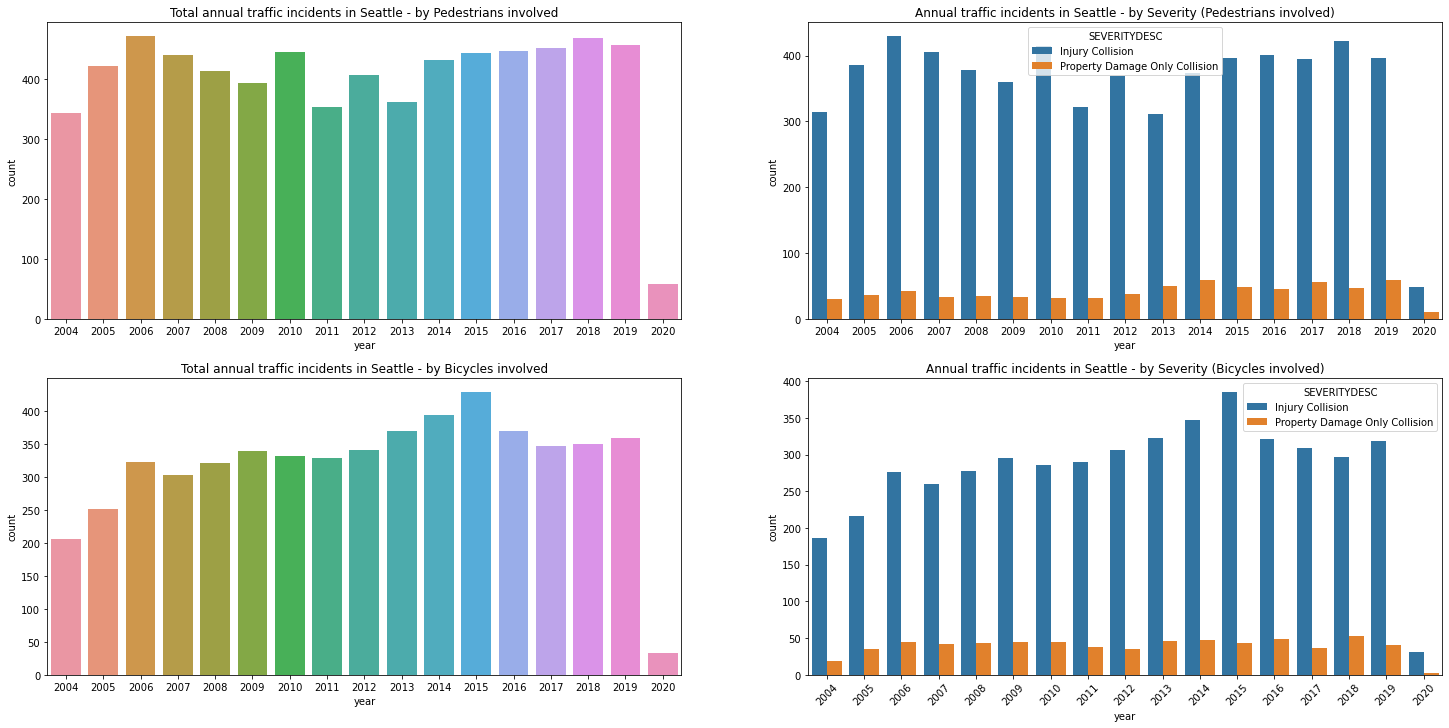

In [12]:
df_pedest = df.copy()
df_pedest.drop(df[df.PEDCOUNT < 1].index, inplace=True)
df_bicycl = df.copy()
df_bicycl.drop(df[df.PEDCYLCOUNT < 1].index, inplace=True)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 12))

df_pedest['year'] = pd.DatetimeIndex(df_pedest['INCDATE']).year
df_pedest['year'].value_counts().sort_index()
df_bicycl['year'] = pd.DatetimeIndex(df_bicycl['INCDATE']).year
df_bicycl['year'].value_counts().sort_index()
sns.countplot(x="year", data=df_pedest, ax=ax1)
plt.xticks(rotation=45)
sns.countplot(x="year", hue="SEVERITYDESC", data=df_pedest, ax=ax2)
plt.xticks(rotation=45)
sns.countplot(x="year", data=df_bicycl, ax=ax3)
plt.xticks(rotation=45)
sns.countplot(x="year", hue="SEVERITYDESC", data=df_bicycl, ax=ax4)
plt.xticks(rotation=45)
ax1.set_title('Total annual traffic incidents in Seattle - by Pedestrians involved')
ax2.set_title('Annual traffic incidents in Seattle - by Severity (Pedestrians involved)')
ax3.set_title('Total annual traffic incidents in Seattle - by Bicycles involved')
ax4.set_title('Annual traffic incidents in Seattle - by Severity (Bicycles involved)')

#### 2.3 Analysis of accidents caused by weather
Almost 60 % of collisions occurs whent the weather is clear. 17,86 % collisions occurs when raining. 14,87 % - when overcast.
Three main weather conditions had biggest influence to collisions. I will skip 'Unknown' variable, because weather conditions was unknown. Further I will analyse the influence of these three weather conditions. According to the data 60,3 % of collisions, when at least 1 pedestrian was involved, occured when weather was clear. However, 61,3 % of collisions, when more than 1 pedestrian was involved, occured when weather was clear.
72,5 % of collisions, when at least 1 bicycle was involved, occured when weather was clear. Also, 75,6 % of collisions, when more than 1 bicycle was involved, occured when weather was clear.  
It can be said, that weather wasn't main reason of seriousness of collisions, which involves pedestrians and cyclist. 

                          Number of collisions
weather_type                                  
Clear                                   107692
Raining                                  31719
Overcast                                 26809
Unknown                                  11505
Snowing                                    875
Other                                      728
Fog/Smog/Smoke                             549
Sleet/Hail/Freezing Rain                   112
Blowing Sand/Dirt                           49
Severe Crosswind                            24
Partly Cloudy                                5


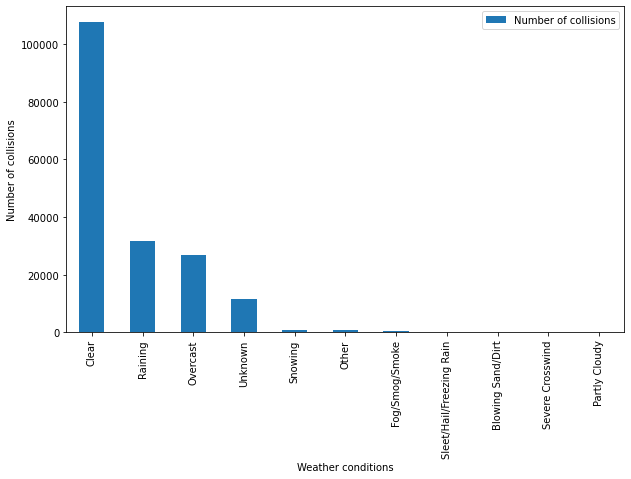

In [13]:
df_w = df['WEATHER'].value_counts().to_frame()
df_w.rename(columns={'WEATHER': 'Number of collisions'}, inplace=True)
df_w.index.name = 'weather_type'
df_w.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Weather conditions')
plt.ylabel('Number of collisions')
print(df_w)
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


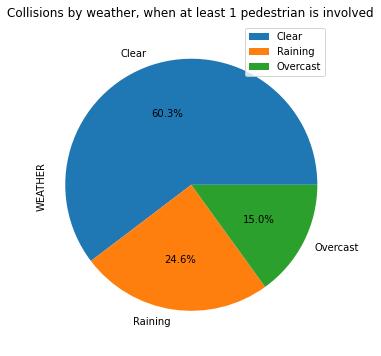

In [14]:
df_ped = df[['PEDCOUNT', 'WEATHER']]
df_ped.set_index('PEDCOUNT', inplace=True)
df_ped.drop(index=0, inplace=True)
df_ped1 = df_ped['WEATHER'].value_counts().to_frame()
df_ped3 = df_ped1.head(3)
df_ped3.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%', 
             subplots=True
            )
plt.title('Collisions by weather, when at least 1 pedestrian is involved')
plt.axis('equal')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


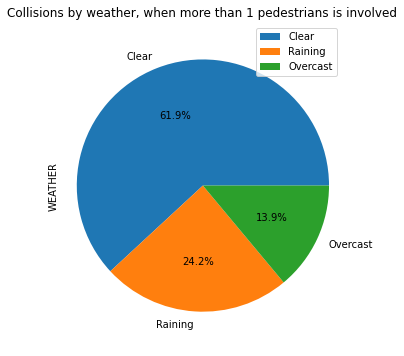

In [15]:
df_ped = df[['PEDCOUNT', 'WEATHER']]
df_ped.set_index('PEDCOUNT', inplace=True)
df_ped.drop(index=0, inplace=True)
df_ped.drop(index=1, inplace=True)
df_ped1 = df_ped['WEATHER'].value_counts().to_frame()
df_ped3 = df_ped1.head(3)
df_ped3.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%',
             subplots=True
            )
plt.title('Collisions by weather, when more than 1 pedestrians is involved')
plt.axis('equal')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


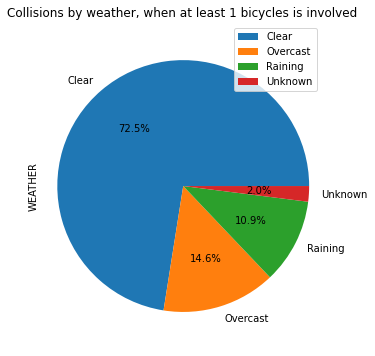

In [16]:
df_bic = df[['PEDCYLCOUNT', 'WEATHER']]
df_bic.set_index('PEDCYLCOUNT', inplace=True)
df_bic.drop(index=0, inplace=True)
df_bic1 = df_bic['WEATHER'].value_counts().to_frame()
df_bic3 = df_bic1.head(4)
df_bic3.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%', # add in percentages
             subplots=True
            )
plt.title('Collisions by weather, when at least 1 bicycles is involved')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


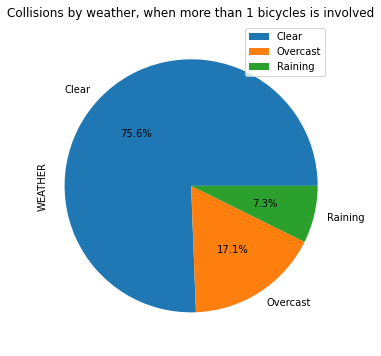

In [17]:
df_bic = df[['PEDCYLCOUNT', 'WEATHER']]
df_bic.set_index('PEDCYLCOUNT', inplace=True)
df_bic.drop(index=0, inplace=True)
df_bic.drop(index=1, inplace=True)
df_bic1 = df_bic['WEATHER'].value_counts().to_frame()
df_bic4 = df_bic1.head()
df_bic4.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%', # add in percentages
             subplots=True
            )
plt.title('Collisions by weather, when more than 1 bicycles is involved')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

#### 2.4 Analysis of accidents caused by road condittion.
Almost 67 % of collisions occurs whent the road was dry. 25,55 % collisions occurs when road was wet.
Two main road conditions had biggest influence to collisions. I will skip 'Unknown' variable, because road conditions was unknown. Further I will analyse the influence of these three weather conditions. According to the data 67,7 % of collisions, when at least 1 pedestrian was involved, and 82,5 % of collisions, when at least 1 cyclist was involved, occured when road was dry. It can be said, that road conditions wasn't main reason of seriousness of collisions, which involves pedestrians and cyclist. 

                Number of collisions
road_cond                           
Dry                           120629
Wet                            45597
Unknown                        11384
Ice                             1161
Snow/Slush                       971
Other                            115
Standing Water                    99
Sand/Mud/Dirt                     62
Oil                               49


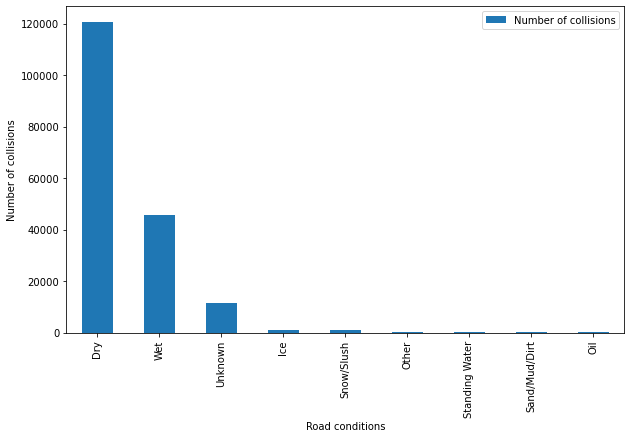

In [18]:
df_r = df['ROADCOND'].value_counts().to_frame()
df_r.rename(columns={'ROADCOND': 'Number of collisions'}, inplace=True)
df_r.index.name = 'road_cond'
df_r.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Road conditions')
plt.ylabel('Number of collisions') 
print(df_r)
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


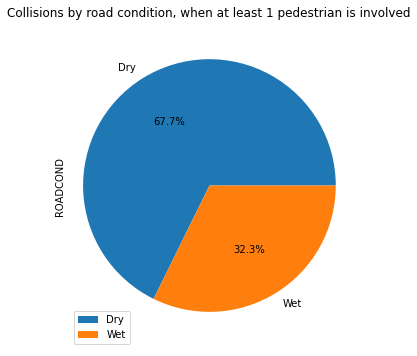

In [19]:
df_pedr = df[['PEDCOUNT', 'ROADCOND']]
df_pedr.set_index('PEDCOUNT', inplace=True)
df_pedr.drop(index=0, inplace=True)
df_pedr1 = df_pedr['ROADCOND'].value_counts().to_frame()
df_pedr2 = df_pedr1.head(2)
df_pedr2.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%', 
             subplots=True
             )
plt.title('Collisions by road condition, when at least 1 pedestrian is involved')
plt.axis('equal')
plt.show()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


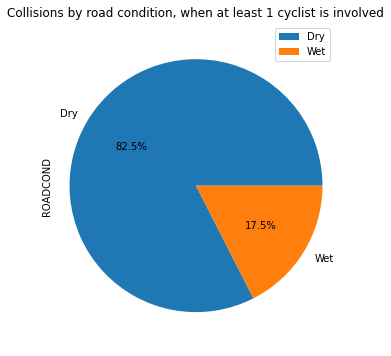

In [20]:
df_pedcr = df[['PEDCYLCOUNT', 'ROADCOND']]
df_pedcr.set_index('PEDCYLCOUNT', inplace=True)
df_pedcr.drop(index=0, inplace=True)
df_pedcr1 = df_pedcr['ROADCOND'].value_counts().to_frame()
df_pedcr2 = df_pedcr1.head(2)
df_pedcr2.plot(kind='pie',
             figsize=(5, 6),
             autopct='%1.1f%%', 
             subplots=True
            )
plt.title('Collisions by road condition, when at least 1 cyclist is involved')
plt.axis('equal')
plt.show()

#### 2.5 Light Condition
Most of accidents happens in daylight and when dark-street lights on. 

In [21]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,112216
Dark - Street Lights On,46683
Unknown,10340
Dusk,5708
Dawn,2389
Dark - No Street Lights,1418
Dark - Street Lights Off,1130
Other,172
Dark - Unknown Lighting,11


Text(0.5, 1.0, 'Annual traffic incidents in Seattle - by Bicycles involved')

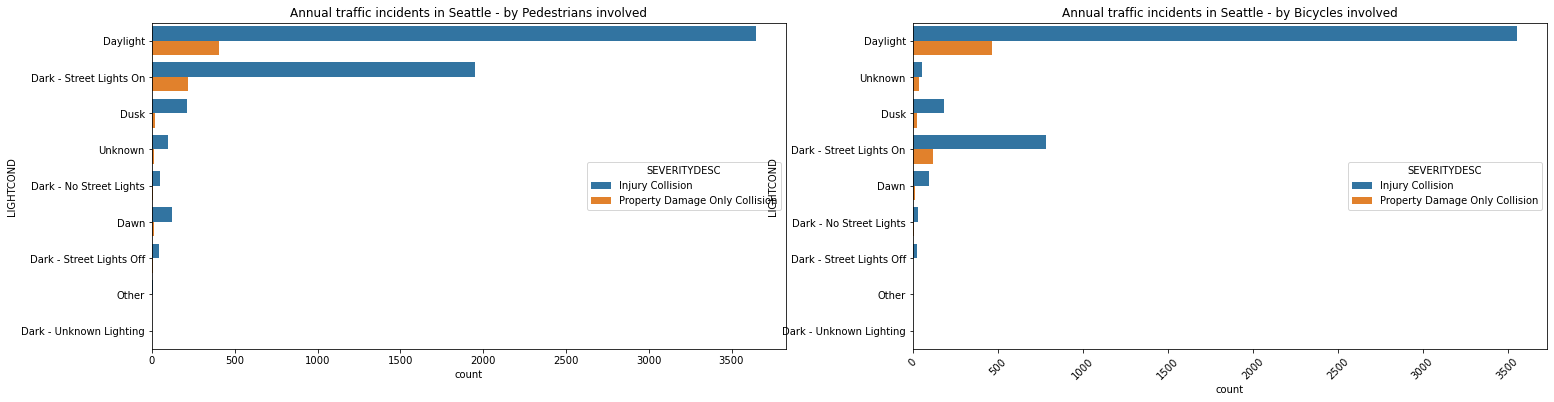

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 6))
sns.countplot(y="LIGHTCOND", hue="SEVERITYDESC", data=df_pedest, ax=ax1)
plt.xticks(rotation=45)
sns.countplot(y="LIGHTCOND", hue="SEVERITYDESC", data=df_bicycl, ax=ax2)
plt.xticks(rotation=45)
ax1.set_title('Annual traffic incidents in Seattle - by Pedestrians involved')
ax2.set_title('Annual traffic incidents in Seattle - by Bicycles involved')

#### 2.6 Inattention factor

Inattention is rather common factor of collisions. Inattention was one of the factors that led to the collisions. This factor related to 14,99 % collisions, when property was damaged, and to 18,21 % collisions, when someone was injured.

In [23]:
df['INATTENTIONIND'].value_counts().to_frame()

,INATTENTIONIND
N,151276
Y,28791


In [24]:
#fixing inattention data. 
df['INATTENTIONIND'].replace(to_replace=['N',], value=[0],inplace=True)
df['INATTENTIONIND'].replace(to_replace=['Y',], value=[1],inplace=True)

In [25]:
df_inat = df[['SEVERITYCODE','INATTENTIONIND']].groupby(['SEVERITYCODE'],as_index=True).sum()
df_inat.columns = ['Count of inattentions']
df_inat['Count of accidents'] = df['SEVERITYCODE'].value_counts().to_frame()
df_inat['Relative count of inattentions'] = df_inat['Count of inattentions'] / df_inat['Count of accidents']
df_inat

,Count of inattentions,Count of accidents,Relative count of inattentions
SEVERITYCODE,,,
1,18625,124258,0.149890
2,10166,55809,0.182157


#### 2.7 Speeding factor
Speeding is common factor of collisions. Speeding was one of the factors that led to the collisions. This factor related to 4,3 % collisions, when property was damaged, and to 5,92 % collisions, when someone was injured.

In [26]:
df['SPEEDING'].value_counts().to_frame()

,SPEEDING
N,171417
Y,8650


In [27]:
#fixing speeding data. 
df['SPEEDING'].replace(to_replace=['N',], value=[0],inplace=True)
df['SPEEDING'].replace(to_replace=['Y',], value=[1],inplace=True)

In [28]:
df_speed = df[['SEVERITYCODE','SPEEDING']].groupby(['SEVERITYCODE'],as_index=True).sum()
df_speed.columns = ['Count of speedings']
df_speed['Count of accidents'] = df['SEVERITYCODE'].value_counts().to_frame()
df_speed['Relative count of speedings'] = df_speed['Count of speedings'] / df_speed['Count of accidents']
df_speed

,Count of speedings,Count of accidents,Relative count of speedings
SEVERITYCODE,,,
1,5343,124258,0.042999
2,3307,55809,0.059256


#### 2.8 Location of collisions

In [ ]:
latitude = df['Y'].mean()
longitude = df['X'].mean()
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng in zip(df.Y, df.X):
    if ~np.isnan(lat) and ~np.isnan(lng):
        folium.Marker(
            location=[lat, lng],
            icon=None,
        ).add_to(incidents)

# add incidents to map
seattle_map.add_child(incidents)

seattle_map

*NOTE: notebook with Map and all accidents displayed was too big for a GitHub*

### 3. Methodology

#### 3.1 Variable selection

I will use WEATHER, ROADCOND, LIGHTCOND, INATTENTIONIND, SPEEDING and location (X,Y) as attributes to classify SEVERITYCODE. First I will need to prepare these features so it is suitable for a binary classification model. I will use all data and few machine learning algorithms like KNN, SVM, Logistic Regression and Decision Tree for build up models to analyze their performance and predict the collision severity.
Later, I will use best performed model to analyse data of collisions which includes pedestrians and cyclist.

In [29]:
# Seperate the attributes for working 
data = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y', 'SEVERITYCODE']]
data.head()

,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,SPEEDING,X,Y,SEVERITYCODE
0,Overcast,Wet,Daylight,0,0,-122.323148,47.703140,2
1,Raining,Wet,Dark - Street Lights On,0,0,-122.347294,47.647172,1
2,Overcast,Dry,Daylight,0,0,-122.334540,47.607871,1
3,Clear,Dry,Daylight,0,0,-122.334803,47.604803,1
4,Raining,Wet,Daylight,0,0,-122.306426,47.545739,2


In [30]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

X = data[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y']]
X = pd.concat([X,pd.get_dummies(data[['WEATHER', 'ROADCOND', 'LIGHTCOND']])], axis=1)
X.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1,inplace=True)

X.head()

,INATTENTIONIND,SPEEDING,X,Y,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,-122.323148,47.703140,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,-122.347294,47.647172,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,-122.334540,47.607871,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,-122.334803,47.604803,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,-122.306426,47.545739,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [31]:
#Target variable preprocessing
y = data['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

#### 3.2 Normalize data

In [32]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[-0.43625795, -0.22463691,  0.24396521,  1.48477487, -0.01649833,
        -1.21982473, -0.0553009 , -0.06371304,  2.39095427, -0.00526956,
        -0.46240114, -0.01154563, -0.0249475 , -0.06987868, -0.26125432,
        -1.42460272, -0.08055707, -0.01649833, -0.02527962, -0.01855896,
        -0.07363201, -0.02345416, -0.25978363,  1.71729366, -0.08909182,
        -0.07946743, -0.59159911, -0.00781614, -0.11595547,  0.77759012,
        -0.18093384, -0.03092108, -0.24682253],
       [-0.43625795, -0.22463691, -0.56150856,  0.49122186, -0.01649833,
        -1.21982473, -0.0553009 , -0.06371304, -0.41824305, -0.00526956,
         2.16262443, -0.01154563, -0.0249475 , -0.06987868, -0.26125432,
        -1.42460272, -0.08055707, -0.01649833, -0.02527962, -0.01855896,
        -0.07363201, -0.02345416, -0.25978363,  1.71729366, -0.08909182,
        -0.07946743,  1.69033386, -0.00781614, -0.11595547, -1.28602457,
        -0.18093384, -0.03092108, -0.24682253],
       [-0.43625795, -0.2246

#### 3.3 Splitting data set to Train/Test
The data will be splitted in following ratio:

* 80% to train model
* 20% to test model

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (144053, 33) (144053,)
Test set: (36014, 33) (36014,)


### 4. Modelling

I will use the training set to build an accurate model. Then use the test set to report the accuracy of individual models. Most polular ML algorithms for data classification will be compared:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression
To ensure best model settings I will try to select best parameters from the model using Grid search, i.e. testing different panaremeters, like different number of K neigbors, and selecting one with hihgest estimate accuracy.

#### 4.1 K-Nearest Neighbours

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.66721275059699 with k= 8


#### 4.2 Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
creditTree = DecisionTreeClassifier(criterion="entropy")
creditTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### 4.3 Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='newton-cg').fit(X_train,y_train)
LR

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

#### 4.4 Support Vector Machine

In [35]:
from sklearn import svm
clf = svm.SVC(C=0.1, kernel='rbf', gamma='scale')
clf.fit(X_train, y_train) 

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 4.5 Model evaluation

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [43]:
yhat_DTree = creditTree.predict(X_test)

In [44]:
yhat_svm = clf.predict(X_test)

In [41]:
yhat_LR = LR.predict(X_test)

In [45]:
#creating matrix
ev_matrix = {'Algorithm':['KNN', 'DT', 'SVM', 'LR'], \
             'Jaccard':[jaccard_similarity_score(y_test, yhat), \
                        jaccard_similarity_score(y_test, yhat_DTree), \
                        jaccard_similarity_score(y_test, yhat_svm), \
                        jaccard_similarity_score(y_test, yhat_LR) ], \
             'F-1 Score':[f1_score(y_test, yhat, average='weighted'), \
                        f1_score(y_test, yhat_DTree, average='weighted'), \
                        f1_score(y_test, yhat_svm, average='weighted'), \
                        f1_score(y_test, yhat_LR, average='weighted') ] } 
  
# Creating dataframe 
df_em = pd.DataFrame(ev_matrix) 
df_em.set_index('Algorithm',inplace=True)
df_em

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Jaccard,F-1 Score
Algorithm,,
KNN,0.652913,0.616497
DT,0.634698,0.619784
SVM,0.688232,0.561136
LR,0.688232,0.561136


In this analysis was evaluated the performance of 4 machine learning algorithms on the Seattle Collision dataset to predict the severity of an accident knowing the weather, road, light conditions, speeding, inattention and location. Two models (Logistic regression, Support Vector Machine) performed very similary. K-Nearest Neighbours stood out with a slightly higher F-1 score, but lower Jaccard index. SVM and Logisitic regression we were able to meet 68,8% accuracy (measured by Jaccard index). But these two algorithms is characterized by lowest accuracy in estimating it by F-1 score. According to average of accuracy measures, best performance was reached with KNN algorithm. I will test this algorihm with pedestrians collision data and cyclist collision data.

In [68]:
df_pedest_last = df.copy()
df_pedest_last.drop(df[df.PEDCOUNT < 1].index, inplace=True)
df_bicycl_last = df.copy()
df_bicycl_last.drop(df[df.PEDCYLCOUNT < 1].index, inplace=True)
data1 = df_pedest_last[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y', 'SEVERITYCODE']]
data2 = df_bicycl_last[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y', 'SEVERITYCODE']]

In [69]:
X1 = data1[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y']]
X1 = pd.concat([X1,pd.get_dummies(data1[['WEATHER', 'ROADCOND', 'LIGHTCOND']])], axis=1)
X1.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1,inplace=True)

X2 = data2[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'SPEEDING', 'X', 'Y']]
X2 = pd.concat([X2,pd.get_dummies(data2[['WEATHER', 'ROADCOND', 'LIGHTCOND']])], axis=1)
X2.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis = 1,inplace=True)

In [71]:
y1 = data1['SEVERITYCODE'].values
y2 = data2['SEVERITYCODE'].values
X1 = preprocessing.StandardScaler().fit(X1).transform(X1)
X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing t

In [73]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
print ('Train set(pedestrians):', X1_train.shape,  y1_train.shape)
print ('Test set(pedestrians):', X1_test.shape,  y1_test.shape)
X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.2, random_state=4)
print ('Train set(cyclist):', X2_train.shape,  y2_train.shape)
print ('Test set(cyclist):', X2_test.shape,  y2_test.shape)

Train set(pedestrians): (5446, 30) (5446,)
Test set(pedestrians): (1362, 30) (1362,)
Train set(cyclist): (4309, 30) (4309,)
Test set(cyclist): (1078, 30) (1078,)


In [74]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    yhat1=neigh.predict(X1_test)
    mean_acc[n-1] = metrics.accuracy_score(y1_test, yhat1)

    
    std_acc[n-1]=np.std(yhat1==y1_test)/np.sqrt(yhat1.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.895007342143906 with k= 9


In [75]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    yhat2=neigh.predict(X2_test)
    mean_acc[n-1] = metrics.accuracy_score(y2_test, yhat2)

    
    std_acc[n-1]=np.std(yhat2==y2_test)/np.sqrt(yhat2.shape[0])

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.8710575139146568 with k= 17


In [81]:
ev_matrix = {'KNN':['Pedestrians', 'Cyclist'], \
             'Jaccard':[jaccard_similarity_score(y1_test, yhat1), \
                        jaccard_similarity_score(y2_test, yhat2) ], \
             'F-1 Score':[f1_score(y1_test, yhat1, average='weighted'), \
                        f1_score(y2_test, yhat2, average='weighted')]} 
  
# Creating dataframe 
df_em = pd.DataFrame(ev_matrix) 
df_em.set_index('KNN',inplace=True)
df_em

,Jaccard,F-1 Score
KNN,,
Pedestrians,0.895007,0.845420
Cyclist,0.871058,0.816186


### 5. Results and discussion

According to this research, created model was even better for classification of collisions severity, when pedestrians and cyclist is included. I have reached almost 90 % accuracy for pedestrians involved collisions and 87 % accuracy for bycicles involved collisions. These results are important for the safety of pedestrians and cyclists in big cities.

### Conclusion

As a result, more often people are using public transport, bicycles and travel on foot in big cities. For this reason, we need better understanding of collisions, which includes pedestrians and cyclist. Historically, data shows that total situation of collisions is getting better. But situation of collisions when pedestriant or bycicles is involved doesn't change over the year. Research results shows that weather, road condition, light condition, inattention, speeding and location factors is very important to classify collisions severity. Understandably, more detailed analysis and more detailed data are needed to achieve better results.